In [20]:
# import data
import pandas as pd
import matplotlib.pyplot as plot
df = pd.read_csv("C:/Users/- LENOVO -/Downloads/daily-total-female-births.csv")
print(df)

           Date  Births
0    1959-01-01      35
1    1959-01-02      32
2    1959-01-03      30
3    1959-01-04      31
4    1959-01-05      44
..          ...     ...
360  1959-12-27      37
361  1959-12-28      52
362  1959-12-29      48
363  1959-12-30      55
364  1959-12-31      50

[365 rows x 2 columns]


<Axes: >

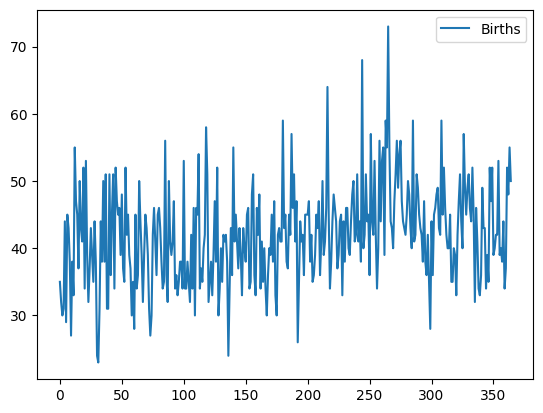

In [13]:
# menampilkan plot data yang digunakan untuk forecasting
df.plot()

In [23]:
# membagi data menjadi data test dan train
jumlah_data = len(df)
set = int(0.8 * jumlah_data)
train  = df[0:set]
test = df[set:]
print("Jumlah Data : ", jumlah_data, "\n")
print("Data Test : ", test.shape, "\n")
print("Data Train : ", train.shape,"\n")


Jumlah Data :  365 

Data Test :  (73, 2) 

Data Train :  (292, 2) 



<Axes: >

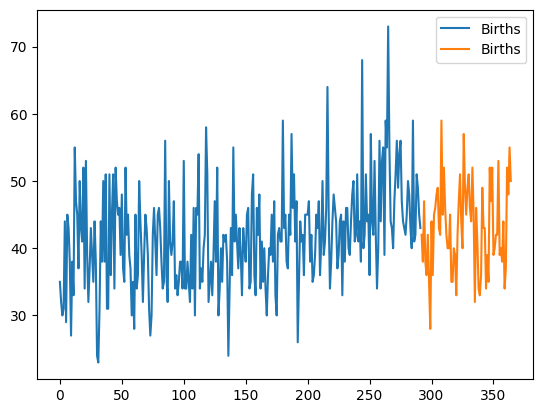

In [31]:
# membuat plot untuk mengilustrasikan data test dan train
fig,ax = plot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [37]:
train.tail()

,Date,Births
287,1959-10-15,42
288,1959-10-16,51
289,1959-10-17,49
290,1959-10-18,45
291,1959-10-19,43


In [38]:
test.head()

,Date,Births
292,1959-10-20,42
293,1959-10-21,38
294,1959-10-22,47
295,1959-10-23,38
296,1959-10-24,36


In [50]:
import pmdarima as pm 
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p = 2,
                              start_q = 0,
                              test = "adf",
                              seasonal = True,
                              trace = True,
                              stepwise= False)
    return automodel

train_births = train['Births']
automodel =arimamodel(train_births)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=2011.453, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2003.556, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2001.433, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2002.005, Time=0.14 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2003.464, Time=0.22 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2005.035, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=2001.199, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=1993.792, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1994.198, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=1994.087, Time=0.53 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=1994.207, Time=0.73 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1999.509, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=1997.051, Time=0.43 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=1998.941, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,0,0)(0

In [51]:
# Forecasting
predict_arima = automodel.predict(n_periods=test.shape[0])
predict_arima

292    43.146224
293    42.804056
294    42.528682
295    42.307064
296    42.128709
         ...    
360    41.393405
361    41.393405
362    41.393405
363    41.393405
364    41.393405
Length: 73, dtype: float64

Text(0, 0.5, 'Usia')

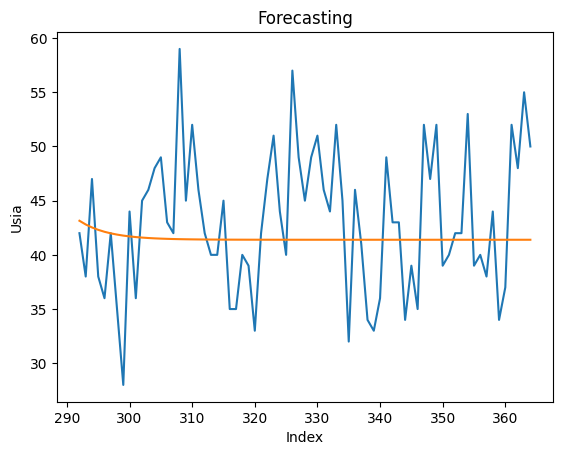

In [62]:
plot.plot(test.index, test['Births'], label = "Nilai Aktual")
plot.plot(test.index, predict_arima, label = "Nilai Prediksi")
plot.title("Forecasting")
plot.xlabel("Index")
plot.ylabel("Usia")

In [67]:
# Evaluasi model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['Births'], predict_arima)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 44.26685592549165
